## Jiayi's Sudoku solver (part1) - using backtracking and other non-machine learning methods

#### A demo for how different thought processes would or would not solve a given Sudoku puzzle

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jiayi_sudoku_solver.Sudoku as Sudoku # import a module from Sudoku.py script 
from jiayi_sudoku_solver.backtracking import fill_val_with_certainties, back_tracking_solve, solve_sudoku_with_conventional_methods,get_pos_val_dict
from jiayi_sudoku_solver.util import *
from time import time

#### Method 1: iteratively find unique solution with certainty and fill out the missing part.

For example, if a cell could only be 1 and not other numbers, then 1 will be filled. Filled numbers will be displayed in grey while the given number will be labeled in black.

Look at an easy puzzle first

In [3]:
startingSudoku1 =   """
                    430260700
                    682070493
                    107804500
                    820190047
                    004602910
                    950703028
                    509306070
                    240057106
                    703018250
                    """

total time used for filling in sure values was 0.0 seconds
Solved!


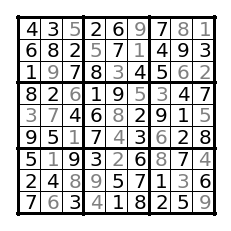

In [4]:
sudoku_obj = Sudoku.Sudoku(startingSudoku1)
fill_val_with_certainties(sudoku_obj.np_Sudoku)

Now let's try a difficult one, Vegard Hanssen puzzle 2155141 taken from [here](https://sandiway.arizona.edu/sudoku/examples.html)

In [5]:
startingSudoku2 = """
                    000600400
                    700003600
                    000091080
                    000000000
                    050180003
                    000306045
                    040200060
                    903000000
                    020000100
                    """

total time used for filling in sure values was 0.0 seconds
Filling positions with certainties was not enough to solve it!


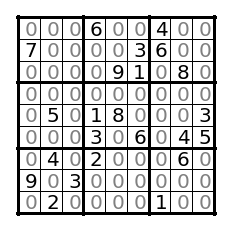

In [6]:
sudoku_obj = Sudoku.Sudoku(startingSudoku2)
x = fill_val_with_certainties(sudoku_obj.np_Sudoku)

It turned out for startingSudoku2, there is not a single certain value one could identify.

Let's try another random one from the internet

In [7]:
startingSudoku3 = """
                    020608000
                    580009700
                    000040000
                    370000500
                    600000004
                    008000013
                    000020000
                    009800036
                    000306090
                  """

total time used for filling in sure values was 0.0 seconds
Filling positions with certainties was not enough to solve it!


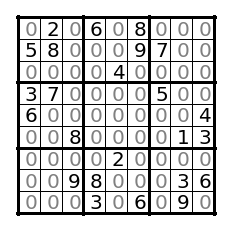

In [8]:
sudoku_obj = Sudoku.Sudoku(startingSudoku3)
x = fill_val_with_certainties(sudoku_obj.np_Sudoku)

Oh no! It looks like for common puzzles this method probably will not be able to fill up it full with limited knowledge

#### Method 2: backtracking

Total time cost for solving with only backtracking is 0.02


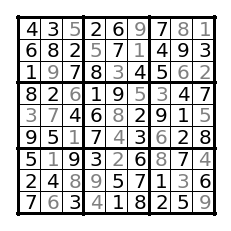

In [9]:
start = time()
sudoku_obj = Sudoku.Sudoku(startingSudoku1)
coord = generate_empty_coord(sudoku_obj.np_Sudoku)
pos_val_dict = get_pos_val_dict(sudoku_obj.np_Sudoku, coord)
back_tracking_solve(sudoku_obj.np_Sudoku, 0, pos_val_dict)
show_sudoku_filled(sudoku_obj.np_Sudoku_original, sudoku_obj.np_Sudoku)
end = time()
print(f'Total time cost for solving with only backtracking is {round((end-start), 2)}')

Pretty fast, but not as fast as method 1

Total time cost for solving with only backtracking is 37.01


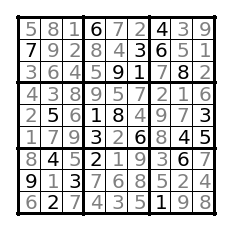

In [10]:
start = time()
sudoku_obj = Sudoku.Sudoku(startingSudoku2)
coord = generate_empty_coord(sudoku_obj.np_Sudoku)
pos_val_dict = get_pos_val_dict(sudoku_obj.np_Sudoku, coord)
back_tracking_solve(sudoku_obj.np_Sudoku, 0, pos_val_dict)
show_sudoku_filled(sudoku_obj.np_Sudoku_original, sudoku_obj.np_Sudoku)
end = time()
print(f'Total time cost for solving with only backtracking is {round((end-start), 2)}')

Total time cost for solving with only backtracking is 1.77


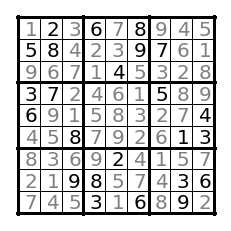

In [11]:
start = time()
sudoku_obj = Sudoku.Sudoku(startingSudoku3)
coord = generate_empty_coord(sudoku_obj.np_Sudoku)
pos_val_dict = get_pos_val_dict(sudoku_obj.np_Sudoku, coord)
back_tracking_solve(sudoku_obj.np_Sudoku, 0, pos_val_dict)
show_sudoku_filled(sudoku_obj.np_Sudoku_original, sudoku_obj.np_Sudoku)
end = time()
print(f'Total time cost for solving with only backtracking is {round((end-start), 2)}')

Overall, backtracking works well but takes longer time if one can know the unique solution

#### Method 3: first fill in the missing by searching unique positional solutions, and for the ones that could not be solved, move on and use backtracking method

total time used for filling in sure values was 0.0 seconds
Solved!


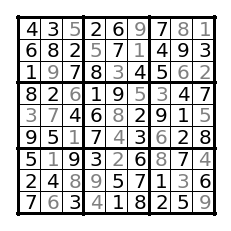

In [12]:
solve_sudoku_with_conventional_methods(startingSudoku1)

total time used for filling in sure values was 0.0 seconds
Filling positions with certainties was not enough to solve it!
Total time cost for backtracking is 36.56 seconds


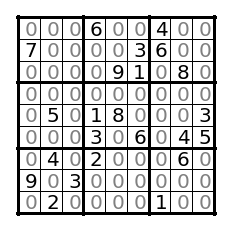

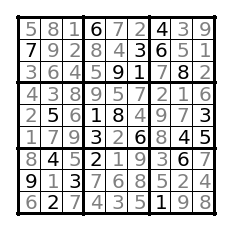

In [13]:
solve_sudoku_with_conventional_methods(startingSudoku2)

total time used for filling in sure values was 0.0 seconds
Filling positions with certainties was not enough to solve it!
Total time cost for backtracking is 1.71 seconds


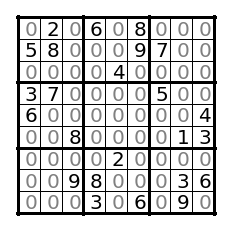

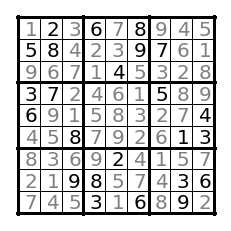

In [14]:
solve_sudoku_with_conventional_methods(startingSudoku3)